In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotnine import *
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#ignore errors about using jupyter notebook or sample size being too small
import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
mpl.rcParams.update({'errorbar.capsize': 5})

# styles from: https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-whitegrid')
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
# plt.style.use('default')

sns.set_style("whitegrid")
sns.set(font_scale=1.4)

In [4]:
df = pd.read_hdf('formatted_digirounds.h5', 'fixed')

### Understanding your data
There are a group of helper functions that you can use from pandas that will let you understand your data in a fast and meaningful way.

In [5]:
df.describe()

,time,patients,time per patient,new patients,prescribing,microbiology,radiology_interpretation,radiology_results,eDocs,relogins,battery
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,131.866667,9.466667,14.749221,1.733333,2.133333,0.600000,1.000000,0.933333,0.866667,1.133333,0.066667
std,32.365914,2.356349,4.670027,1.032796,0.990430,0.632456,0.845154,0.593617,0.516398,0.915475,0.258199
min,90.000000,5.000000,6.785714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,8.000000,11.400000,1.000000,1.500000,0.000000,0.000000,1.000000,1.000000,0.500000,0.000000
50%,145.000000,9.000000,16.444444,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,163.500000,10.500000,18.000000,2.500000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
max,173.000000,14.000000,21.625000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000


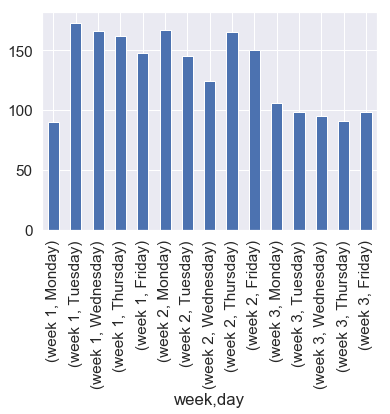

In [6]:
df['time'].plot(kind='bar')
plt.show()

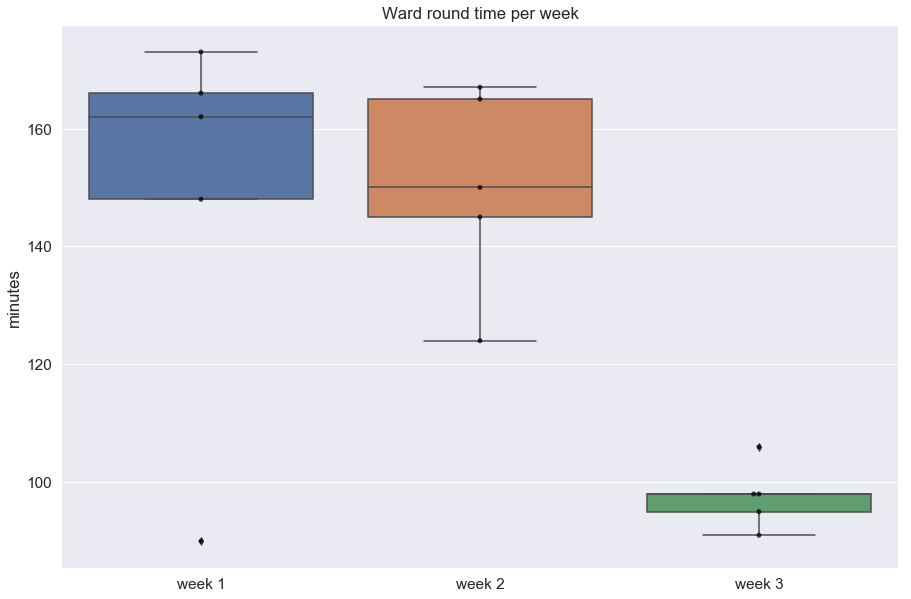

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(x="week", y="time", data=df.reset_index())
ax = sns.swarmplot(x="week", y="time", data=df.reset_index(), color="black", alpha=0.75)
ax.set(title='Ward round time per week', xlabel=None, ylabel='minutes')
plt.show()

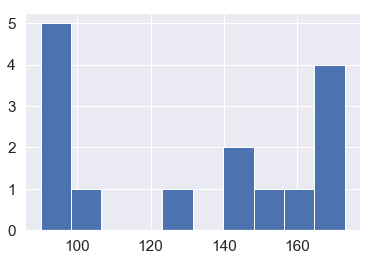

In [8]:
df['time'].hist()
plt.show()

Unfortunately there is not enough data to properly interpret this histogram, so we will create a Kernal Density Plot  instead.

A Density Plot visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise. The peaks of a Density Plot help display where values are concentrated over the interval.

An advantage Density Plots have over Histograms is that they are better at determining the distribution shape because they are not affected by the number of bins used (each bar used in a typical histogram). A Histogram comprising of only 4 bins wouldn't produce a distinguishable enough shape of distribution as a 20-bin Histogram would. However, with Density Plots, this isn't an issue.

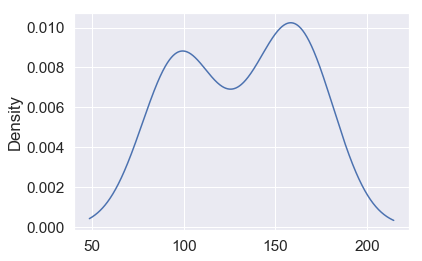

In [9]:
df['time'].plot(kind='density')
plt.show()

### Examples of data transformations for normality:
As we can see in the density plot above there appears to be a bimodal distribution. While the sample size of our data is very small (n=15), we would expect that ward round times would be normally distributed. Instead of simply asking our reviewers to agree with us we can try to transform our data for normality instead. Some common examples of transforming our data are presented below:

![](http://www.statisticssolutions.com/wp-content/uploads/2018/12/b2.png)

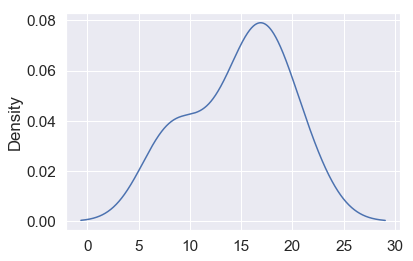

In [10]:
df['time per patient'].plot(kind='density')
plt.show()

In [11]:
df2 = df.reset_index()
df2['week'] = df2['week'] \
    .replace('week 1', 'Laptop') \
    .replace('week 2', 'iPad') \
    .replace('week 3', 'iPad + Laptop')
df2.head()

,week,day,time,patients,time per patient,new patients,prescribing,microbiology,radiology_interpretation,radiology_results,eDocs,relogins,battery
0,Laptop,Monday,90,5,18.000000,0,3,0,1,1,1,1,1
1,Laptop,Tuesday,173,8,21.625000,2,1,1,1,1,1,0,0
2,Laptop,Wednesday,166,8,20.750000,3,3,0,1,1,1,3,0
3,Laptop,Thursday,162,9,18.000000,2,2,0,1,1,1,2,0
4,Laptop,Friday,148,9,16.444444,1,2,1,0,0,0,1,0


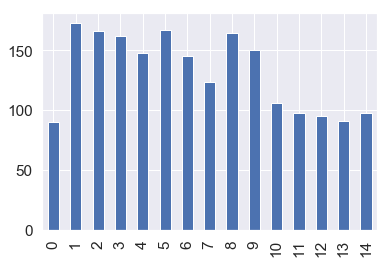

In [12]:
df2['time'].plot(kind='bar')

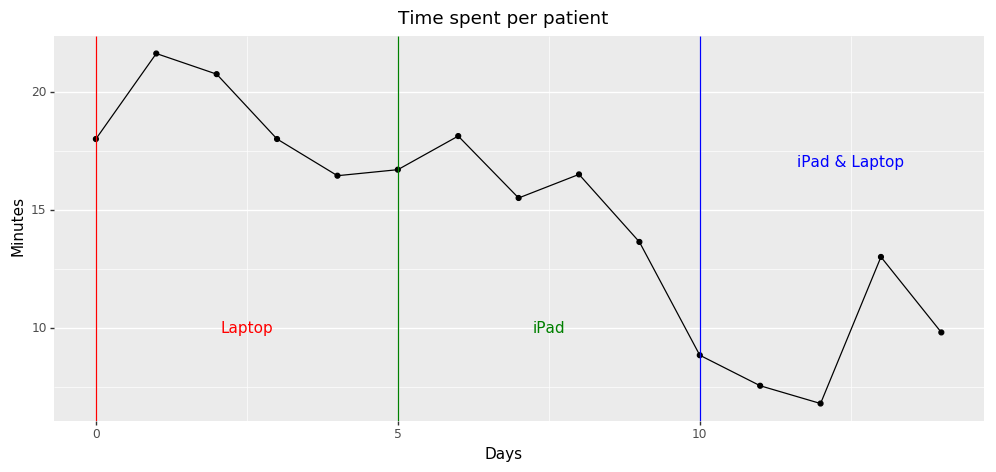

In [59]:
fig = (ggplot(df2, aes(x='df2.index', y='time per patient'))
 + geom_point()
 + geom_line()
 + annotate("text", x = 2.5, y = 10, label="Laptop", color='red')
 + geom_vline(xintercept=0, color='red')
 + annotate("text", x = 7.5, y = 10, label="iPad", color='green')
 + geom_vline(xintercept=5, color='green')
 + annotate("text", x = 12.5, y = 17, label="iPad & Laptop", color='blue')
 + geom_vline(xintercept=10, color='blue')
 + labs(title='Time spent per patient', x='Days', y='Minutes')
 + theme(figure_size=(12, 5))
).draw()
plt.savefig('meanpp_changes.jpg')
plt.show()

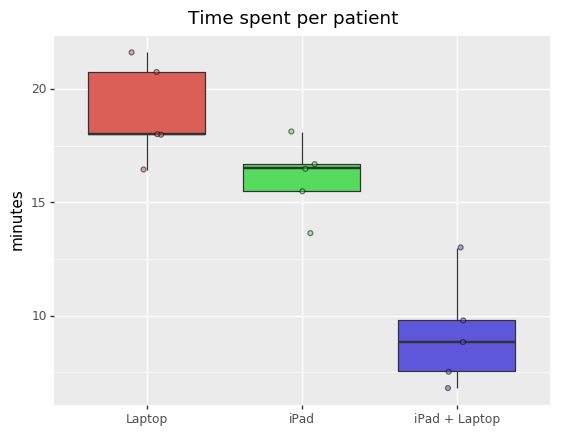

In [13]:
fig = (ggplot(df2, aes(x='week', y='time per patient', fill='week'))
 + geom_boxplot(outlier_alpha=0)
 + geom_jitter(width=0.1, alpha=0.5)
 + labs(title='Time spent per patient', x=None, y='minutes')
 + theme(legend_position='none')
).draw()
plt.savefig('mean_timepp.eps')
plt.show()

In [15]:
df2.head()

,week,day,time,patients,time per patient,new patients,prescribing,microbiology,radiology_interpretation,radiology_results,eDocs,relogins,battery
0,Laptop,Monday,90,5,18.000000,0,3,0,1,1,1,1,1
1,Laptop,Tuesday,173,8,21.625000,2,1,1,1,1,1,0,0
2,Laptop,Wednesday,166,8,20.750000,3,3,0,1,1,1,3,0
3,Laptop,Thursday,162,9,18.000000,2,2,0,1,1,1,2,0
4,Laptop,Friday,148,9,16.444444,1,2,1,0,0,0,1,0


In [16]:
df

0                 time  patients  time per patient  new patients  prescribing  \
week   day                                                                      
week 1 Monday       90         5         18.000000             0            3   
       Tuesday     173         8         21.625000             2            1   
       Wednesday   166         8         20.750000             3            3   
       Thursday    162         9         18.000000             2            2   
       Friday      148         9         16.444444             1            2   
week 2 Monday      167        10         16.700000             3            3   
       Tuesday     145         8         18.125000             0            2   
       Wednesday   124         8         15.500000             3            3   
       Thursday    165        10         16.500000             2            1   
       Friday      150        11         13.636364             1            2   
week 3 Monday      106        12          8.833333             2            0   
       Tuesday      98        13          7.538462             1            1   
       Wednesday    95        14          6.785714             1            3   
       Thursday     91         7         13.000000             2            3   
       Friday       98        10          9.800000             3            3   

0                 microbiology  radiology_interpretation  radiology_results  \
week   day                                                                    
week 1 Monday                0                         1                  1   
       Tuesday               1                         1                  1   
       Wednesday             0                         1                  1   
       Thursday              0                         1                  1   
       Friday                1                         0                  0   
week 2 Monday                2                         1                  1   
       Tuesday               0                         0                  2   
       Wednesday             0                         2                  2   
       Thursday              1                         0                  1   
       Friday                1                         0                  0   
week 3 Monday                1                         2                  1   
       Tuesday               1                         2                  1   
       Wednesday             0                         2                  1   
       Thursday              1                         0                  1   
       Friday                0                         2                  0   

0                 eDocs  relogins  battery  
week   day                                  
week 1 Monday         1         1        1  
       Tuesday        1         0        0  
       Wednesday      1         3        0  
       Thursday       1         2        0  
       Friday         0         1        0  
week 2 Monday         0         2        0  
       Tuesday        0         0        0  
       Wednesday      1         2        0  
       Thursday       1         2        0  
       Friday         1         1        0  
week 3 Monday         2         0        0  
       Tuesday        1         0        0  
       Wednesday      1         1        0  
       Thursday       1         1        0  
       Friday         1         1        0

In [13]:
weeks_pp = df.groupby('week')['time per patient']
summary = weeks_pp.describe()
summary

,count,mean,std,min,25%,50%,75%,max
week,,,,,,,,
week 1,5.0,18.963889,2.149271,16.444444,18.000000,18.000000,20.75,21.625
week 2,5.0,16.092273,1.662064,13.636364,15.500000,16.500000,16.70,18.125
week 3,5.0,9.191502,2.425055,6.785714,7.538462,8.833333,9.80,13.000


In [16]:
# Add 95% Confidence Interval for Mean descriptors to mimic output from SPSS
def describe_CI(df):
    CI = 0.95
    summary = df.describe()
    summary['se'] = df.std() / np.sqrt(summary['count'])
    h = summary['se'] * stats.t.ppf((1 + CI) / 2, summary['count'][0] - 1)
    summary['lower'] = df.mean() - h
    summary['upper'] = df.mean() + h
    cols = ['count', 'mean', 'std', 'se', 'lower', 'upper', 'min', 'max']
    summary = summary[cols]
    summary.columns = ['N', 
                       'Mean', 
                       'Std. Deviation', 
                       'Std. Error', 
                       '95% Lower Bound', 
                       '95% Upper Bound', 
                       'Minimum', 
                       'Maximum'
                      ]
    return summary
describe_CI(weeks_pp)

,N,Mean,Std. Deviation,Std. Error,95% Lower Bound,95% Upper Bound,Minimum,Maximum
week,,,,,,,,
week 1,5.0,18.963889,2.149271,0.961183,16.295216,21.632562,16.444444,21.625
week 2,5.0,16.092273,1.662064,0.743298,14.028547,18.155998,13.636364,18.125
week 3,5.0,9.191502,2.425055,1.084518,6.180398,12.202605,6.785714,13.000


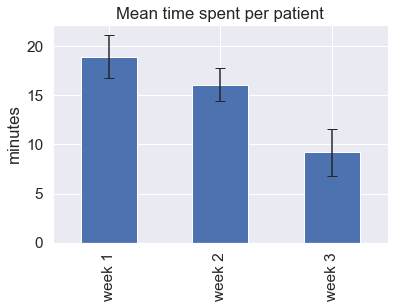

In [17]:
ax = weeks_pp.mean().plot(kind='bar', yerr=weeks_pp.std())
ax.set(title='Mean time spent per patient', xlabel=None, ylabel='minutes')
plt.savefig('meantime_perweek.eps')
plt.show()

In [20]:
weeks_time = pd.DataFrame(weeks_pp.mean()).reset_index()
weeks_time['std'] = weeks_pp.std().values
weeks_time = weeks_time.rename(columns={'time per patient': 'time_pp'})
weeks_time

,week,time_pp,std
0,week 1,18.963889,2.149271
1,week 2,16.092273,1.662064
2,week 3,9.191502,2.425055


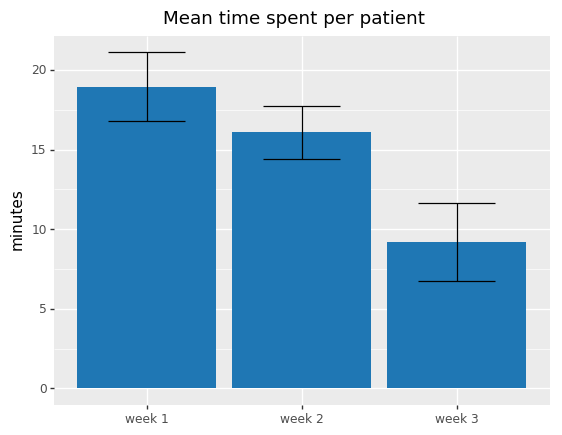

In [21]:
fig = (ggplot(weeks_time, aes(x='week', y='time_pp'))
 + geom_bar(stat='identity', fill='#1F77B4')
 + geom_errorbar(aes(x='week', ymin='time_pp-std', ymax='time_pp+std'))
 + labs(title='Mean time spent per patient', x=None, y='minutes')
).draw()
plt.savefig('meantime_perweek_ggplot.eps')
plt.show()

In [22]:
af = df.reset_index()
af = af.drop('day', axis=1)
for i in range(1,4):
    af.loc[af.query(f'week == "week {i}"').index, 'week'] = i

In [23]:
af.sample(5)

,week,time,patients,time per patient,new patients,prescribing,microbiology,radiology_interpretation,radiology_results,eDocs,relogins,battery
7,2,124,8,15.500000,3,3,0,2,2,1,2,0
9,2,150,11,13.636364,1,2,1,0,0,1,1,0
10,3,106,12,8.833333,2,0,1,2,1,2,0,0
12,3,95,14,6.785714,1,3,0,2,1,1,1,0
8,2,165,10,16.500000,2,1,1,0,1,1,2,0


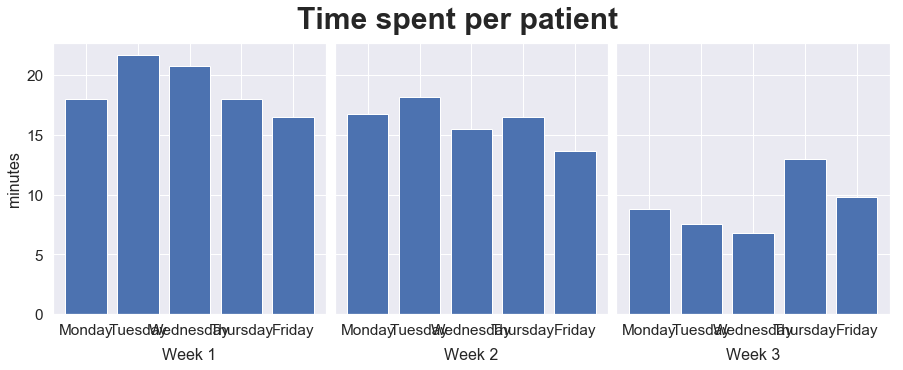

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, gridspec_kw = {'wspace':0.03})
font = {'fontsize': 16}
for i, ax in enumerate(axs):
    week = df.loc[f'week {i+1}']['time per patient']
    ax.bar(week.index, week.values)
    ax.set_xlabel(f'Week {i+1}', fontdict=font, labelpad=10)
axs[0].set_ylabel('minutes', fontdict=font)
fig.suptitle('Time spent per patient', size=30, weight=800)
fig.savefig('wardroundtimes.eps')
fig.show()

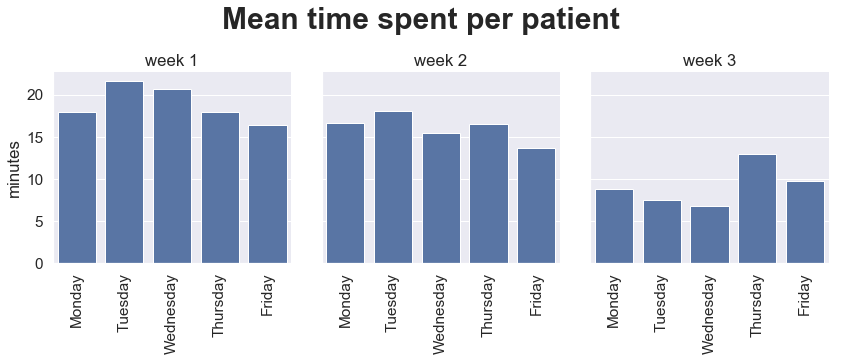

In [25]:
g = sns.FacetGrid(df.reset_index(), col="week", height=4)
g = g.map(sns.barplot, 'day', 'time per patient')
g.fig.suptitle('Mean time spent per patient', size=30, weight=800, y=1.1)
g.set_titles("{col_name}")
g.set_axis_labels('', 'minutes')
g.set_xticklabels(rotation=90)
plt.show()

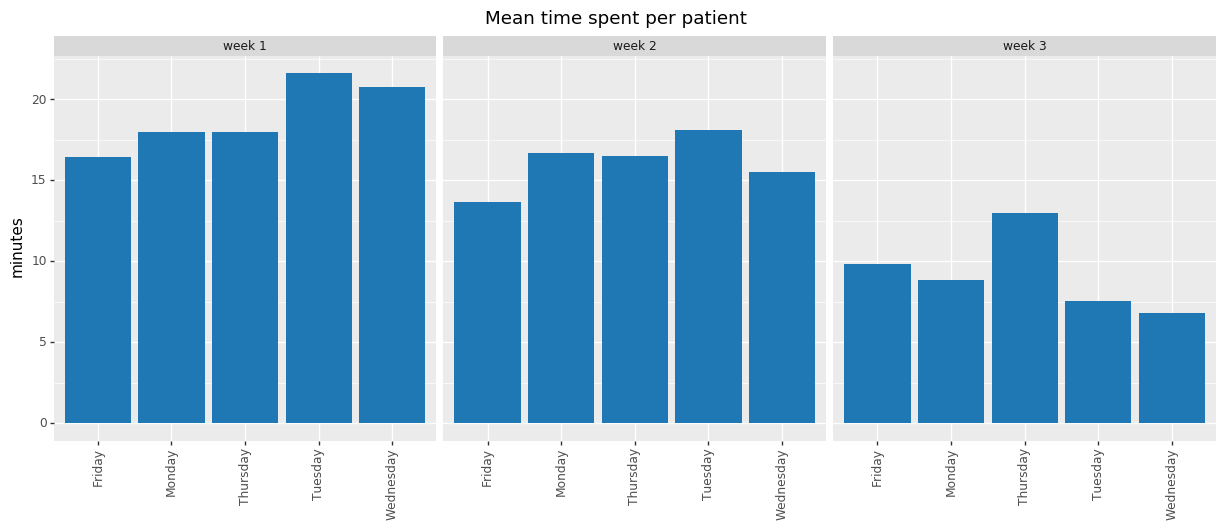

In [26]:
data = df.reset_index().rename(columns={'time per patient':'time_pp'})
fig = (ggplot(data, aes(x='day', y='time_pp'))
 + geom_bar(stat='identity', fill='#1F77B4')
 + facet_grid('~ week')
 + labs(title='Mean time spent per patient', x=None, y='minutes')
 + theme(axis_text_x=element_text(angle=90), figure_size=(15, 5))
).draw()
plt.show()

## Common Statistical Tests for Comparing Groups of Independent and Paired Samples
![](http://work.thaslwanter.at/Stats/html/_images/CommonTests.png)
**Examples**
* **2 groups, nominal** male/female, blond-hair/black-hair. E.g. “Are females more blond than males?”
* **2 groups, nominal, paired** 2 labs, analysis of blood samples. E.g. “Does the blood analysis from Lab1 indicate more infections than the analysis from Lab2?”
* **2 groups, ordinal** black/white, ranking 100m sprint. E.g. “Are black sprinters more successful than white sprinters?”
* **2 groups, ordinal, paired** sprinters, before/after diet. E.g. “Does a chocolate diet make sprinters more successful?”
* **3 groups, ordinal** black/white/chinese, ranking 100m sprint. E.g. “Does ethnicity have an effect on the success of sprinters?”
* **3 groups, ordinal, paired** sprinters, before/after diet. E.g. “Does a rice diet make Chinese sprinters more successful?”
* **2 groups, continuous** male/female, IQ. E.g. “Are women more intelligent than men?”
* **2 groups, continuous, paired** male/female, looking at diamonds. E.g. “Does looking at diamonds raise the female heart-beat more than the male?
* **3 groups, continuous** New Yorker, Bostonian, Texan; IQ. E.g. “Are New Yorkers smarter than people from other US  states?”
* **3 groups, continuous, paired** New Yorker, Bostonian, Texan; looking at mountains. E.g. “Does looking at mountains raise the heartbeat of New Yorker more than those of other people?”

# ANOVA Assumptions
There are 3 assumptions that need to be met for the results of an ANOVA test to be considered accurate and trust worthy. It’s important to note the the assumptions apply to the residuals and not the variables themselves. The ANOVA assumptions are the same as for linear regression and are:
* Normality
    * Caveat to this is, if the group sizes are equal, the F-statistic is robust to violations of normality
* Homogeneity of variance
    * Same caveat as above, if group sizes are equal, the F-statistic is robust to this violation
* Independent observations

If possible, it is best to have groups the same size so corrections to the data do not need to be made. However, with real world data, that is often not the case and one will have to make corrections to the data. If these assumptions are not met, and one does not want to transform the data, an alternative test that could be used is the Kruskal-Wallis H-test or Welch’s ANOVA.

In [27]:
week1 = af.query('week == 1').drop('week', axis=1)
week2 = af.query('week == 2').drop('week', axis=1)
week3 = af.query('week == 3').drop('week', axis=1)

In [28]:
k = 'time per patient'
stats.f_oneway(week1[k], week2[k], week3[k])

F_onewayResult(statistic=28.532307016464628, pvalue=2.7514013223304468e-05)

The `F-statistic=28.532` and the `p-value=0.00003` which is indicating that there is an overall significant effect of time to the week. However, we don’t know where the difference between week/groups is yet. This is in the post-hoc section. A thing to note, is that if you are doing this for academic research purposes, this method is missing some of the information that is required for publication. For example, one would need the degrees of freedom, have to calculate the sum of squares, and conduct post-hoc tests by hand. It’s not difficult to do in Python, but there is a much easier way. Next is how to conduct an ANOVA using the regression formula; since after all, it is a generalized linear model (GLM).

In [29]:
model = ols('Q("time per patient") ~ week', data=df.reset_index()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("time per patient")   R-squared:                       0.826
Model:                               OLS   Adj. R-squared:                  0.797
Method:                    Least Squares   F-statistic:                     28.53
Date:                   Thu, 16 May 2019   Prob (F-statistic):           2.75e-05
Time:                           21:27:14   Log-Likelihood:                -30.758
No. Observations:                     15   AIC:                             67.52
Df Residuals:                         12   BIC:                             69.64
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.9639      0.940     20.168      0.000      16.915      21.013
week[T.week 2]    -2.8716      1.330     -2.159      0.052      -5.769       0.026
week[T.week 3]    -9.7724      1.330     -7.349      0.000     -12.670      -6.875
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.780
Skew:                           0.375   Prob(JB):                        0.677
Kurtosis:                       2.172   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that the helper function `Q()` was used to request data from columns that have spaces or illegal characters.

**Categorical variables**
Looking at the summary printed above, notice that `patsy` determined that elements of week were text strings, so it treated week as a categorical variable. patsy's default is also to include an intercept, so we automatically dropped one of the weeks categories.

If week had been an integer variable that we wanted to treat explicitly as categorical, we could have done so by using the `C()` operator:

In [30]:
res = ols('Q("time per patient") ~ C(week)', data=af).fit()
print(res.params)

Intercept       18.963889
C(week)[T.2]    -2.871616
C(week)[T.3]    -9.772387
dtype: float64


### Operators
We have already seen that `~` separates the left-hand side of the model from the right-hand side, and that `+` adds new columns to the design matrix.

#### Removing variables
The `-` sign can be used to remove columns/variables. For instance, we can remove the intercept from a model by:

In [31]:
res = ols('Q("time per patient") ~ C(week) -1', data=af).fit()
res.params

C(week)[1]    18.963889
C(week)[2]    16.092273
C(week)[3]     9.191502
dtype: float64

#### Multiplicative interactions
`:` adds a new column to the design matrix with the product of the other two columns.

`*` will also include the individual columns that were multiplied together:

In [32]:
res = ols('Q("time per patient") ~ C(week) : Q("new patients") -1', data=af).fit()
res.params

C(week)[1]:Q("new patients")    8.774691
C(week)[2]:Q("new patients")    6.227668
C(week)[3]:Q("new patients")    4.599518
dtype: float64

In [33]:
res = ols('Q("time per patient") ~ C(week) * Q("new patients") -1', data=af).fit()
res.params

C(week)[1]                        17.045940
C(week)[2]                        16.514238
C(week)[3]                         6.191078
Q("new patients")                  1.198718
C(week)[T.2]:Q("new patients")    -1.433143
C(week)[T.3]:Q("new patients")     0.468184
dtype: float64

### Functions
You can apply vectorized functions to the variables in your model:

In [34]:
res = ols(formula='np.log(Q("time per patient")) ~ C(week) -1', data=af).fit()
res.params

C(week)[1]    2.937426
C(week)[2]    2.773928
C(week)[3]    2.192140
dtype: float64

This method provides more information and is overall more useful. The intercept group is the first week since the first week's data was not included in the model’s formula (using helper `C(week)` for this here). The data is still captured because this group has values of 0 in both of the other groups.

Something to note, at the bottom of the table there are a few tests that were conducted to test the models’s assumptions. This will be discussed later and shown how to call these diagnostics without printing out the model in the regression format.

Let’s interpret the table. Overall the model is significiant, `F(2,12)= 28.532, p = 0.00003`. This tells us that there is a significant difference in the group means. The coefficients (coef in the table), are the difference in mean between the control group and the respective group listed. The intercept is the mean for the week 1 group. Looking at the p-values now (P>|t| in the table), we can see the difference between the week 1 and week 2 groups is not significant, `p = 0.052`, but the difference between the week 1 and week 2 groups is, `p = 0.00003`. There is no comparison between the week 2 and week 3 groups. 

I wanted to show you this to see where these numbers come from. Coming from the ANOVA framework, the information we are really after in this table it the F-statistic and it’s corresponding p-value. This tells us if we explained a significant amount of the overall variance. To test between the groups, we need to do some post-hoc testing where we can compare all groups against each other. We are still missing some useful information with this method, we need an ANOVA table.

In [35]:
anova_result = sm.stats.anova_lm(model, typ=2)
anova_result

,sum_sq,df,F,PR(>F)
week,252.277279,2.0,28.532307,0.000028
Residual,53.050869,12.0,NaN,NaN


Let’s break down this ANOVA table. The `C(week)` row is the between groups effect which is the overall experimental effect. The sum of squares for the model (SSM; value 8820.93 in the table) is how much variance is explained by our model. The current model explains a significant amount of variance, `F(2,12)= 28.532, p < 0.05`. The residual row is the unsystematic variation in the data (SSR; also called the unexplained variance; value 53.05 in the table). In this case, the unsystematic variation represents the natural individual differences in time and natural differences between the weeks.

## Calculating Model Effect Size
Something that is useful is the effect size. The effect size tells us how much of an impact the experiment will have in the real world. There are a few different effect sizes one can use: eta squared, and omega squared. Omega squared is considered a better measure of effect size than eta squared because it is unbiased in it’s calculation.

Something to note, for some reason R2 is called eta squared within the ANOVA framework. They are the same thing. R2 is a measure of how much variance is explained by the model and is calculated by taking the explained variance (SSM) and dividing it by the total variance (SST; also called total sum of squares). With the total variance (SST) equaling the sum of squares for the model (SSM) plus the sum of square for the residual (SSR). Thus making the equation for R2 and eta squared:

`eta_sq = SSM / SST`

`eta_sq = 252.28 / 305.33 = 0.826`

This means that the current model accounts for 82.6% of variance contributing to the time.

In [36]:
eta_squared = anova_result.iloc[0]['sum_sq'] / anova_result['sum_sq'].sum()
print("This model accounts for {}% variance in time".format(round(eta_squared*100, 1)))


This model accounts for 82.6% variance in time


Another thing we need to calculate is the mean squares. The mean squares is desired because it eliminates the bias present in the SSM and SSR, and it is also used to calculate the F-statistic and omega squared. SSM and SSR are biased because they are influenced by the number of values summed to calculated them. To calculate the mean squares, one divides the sum of squares (SSM and SSR) by the degrees of freedom respectively.


`MSM = SSM / dfM = 252.28 / 2 = 126.14`

`MSR = SSR / dfR = 52.05 / 12 = 4.3375`

MSM is the average amount of variance explained by the current model, MSR is the average amount of variance unexplained by the current model. The ratio of MSM to MSR is used to calculate the F-statistic. We don’t need to do this since we already have it, but it’s nice to understand where the numbers come from!

`MSM/MSR = 126.14 / 4.34 = 28.53`

In [37]:
c_week = anova_result.iloc[0]
mean_sq_week = c_week['sum_sq'] / c_week['df']
residual = anova_result.iloc[-1]
mean_sq_res = residual['sum_sq'] / residual ['df']
mean_sq_week / mean_sq_res

28.532307016464642

The following function calculates the effect sizes mentioned, as well as the mean squares and updates the table!

In [38]:
def anova_table(aov):
    aov['mean_sq'] = aov['sum_sq'] / aov['df']
    res = aov.iloc[-1]
    for dv in aov.index[:-1]:
        dv = aov.iloc[0]
        aov['eta_sq'] = dv['sum_sq'] / aov['sum_sq'].sum()
        aov['omega_sq'] = (dv['sum_sq'] - (dv['df'] * res['mean_sq'])) / (sum(aov['sum_sq']) + res['mean_sq'])
    aov.loc[aov.index[-1], 'eta_sq'] = None
    aov.loc[aov.index[-1], 'omega_sq'] = None
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov
anova_table(anova_result)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
week,252.277279,2.0,126.138639,28.532307,0.000028,0.82625,0.785912
Residual,53.050869,12.0,4.420906,NaN,NaN,NaN,NaN


# Assumption Checks/Model Diagnostics
As mentioned earlier, when working with linear regression and ANOVA models, the assumptions pertain to the residuals and not the variables themselves. Using Statsmodels, we can use the diagnostics that is already provided. The default output is not pretty, so often times I like to print the model summary as a regression table and look there than use the following code as it’s more readable in the regression table.

In [39]:
model.diagn

{'jb': 0.7796321325229152,
 'jbpv': 0.6771814195539648,
 'skew': 0.3749601689065693,
 'kurtosis': 2.1723340655971803,
 'omni': 0.8255307782445964,
 'omnipv': 0.6618175342078839,
 'condno': 3.732050807568879,
 'mineigval': 1.3397459621556123}

These are the same diagnostics from the bottom of the regression table from before. The Durban-Watson tests is to detect the presence of autocorrelation (not provided when calling diagnostics this way), Jarque-Bera (jb; jbpv is p-value) tests the assumption of normality, Omnibus (omni; omnipv is p-value) tests the assumption of homogeneity of variance, and the Condition Number (condno) assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity.

If the omnibus test were to be significant, an option on how to handle it would be to use a heteroscedasticity corrected coefficient covariance matrix in the .anova_lm() method. This corrects the calculations to account for the heteroscedasticity present. More information on the method can be found on it’s official [documentation page](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm).

## Other ways to check assumptions
Here are some other ways to test the assumptions of the ANOVA model.

### Assumption: Homogeneity of Variance
You can use the Levene's test to test for equal variances between groups. This is part of the scipy.stats library. The reason I prefer to use this method is that the homegeneity of variance assumption should be chekcked for each level of the categorical variable. The diagnostic output provided bvy statsmodels appears to only test it as a whole.

In [40]:
k = 'time per patient'
stats.levene(week1[k], week2[k], week3[k])

LeveneResult(statistic=0.20336884025294366, pvalue=0.8187322108123791)

Levene’s test for homogeneity of variance is **not significant** which indicates that the groups **have equal variances.**

### Assumption: Normality
The assumption of normality is tested on the residuals as a whole which is how the diagnostic information provided by statsmodels tests the residuals. One could use the Jarque-Bera test provided, or one could use Shapiro or others. I will demonstrate how to test for normality using the Shapiro method. The output is not labelled, but the numbers are the test statistic value followed by the p-value. The official documentation can be found [here](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.shapiro.html).

In [41]:
shapiro = stats.shapiro(model.resid)
print(f"ShapiroResult(statistic={shapiro[0]}, pvalue={shapiro[1]})")

ShapiroResult(statistic=0.9497339129447937, pvalue=0.5202701687812805)


The results from the Shapiro-Wilk test is statistically **not significant** which indicates that the residuals are **normally distributed.**

# Post-hoc testing
The overall model was significant, now to test which groups differ. Deciding which groups to compare should be theory driven. There are a few different techniques that can be used. Each of these techniques have different ways of controlling for familywise error rate. 3 common methods are:
* **Fisher's Least Significant Difference (LSD):** Take the groups you want to compare and conduct multiple t-tests. This method requires that the ANOVA model be significant. This method is easy, but receives push back since it doesn’t account for familywise error rate. The argument is that since the overall model was significant, one is protected from increasing the familywise error rate.
* **Bonferroni correction:** Take the alpha the ANOVA was tested at, 0.05, then divide it by the number of planned comparisons. In this case, 0.05/3 = 0.0167. A post-hoc test would have to have an alpha level < 0.0167 to be considered significant. To test the groups, conduct multiple t-tests, but set the alpha value to the corrected value. This method is quick, but often considered too conservative.
* **Tukey's HSD:** This method also controls for familywise error rate with a different method than Bonferroni, and is also considered conservative.

## TUKEY’S HSD POST-HOC COMPARISON

In [42]:
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.libqsturng import psturng

mc = MultiComparison(af['time per patient'], df.reset_index()['week'])
tukey_res = mc.tukeyhsd()
res = pd.DataFrame(tukey_res.summary()[1:], columns=tukey_res.summary()[0])
st_range = np.abs(tukey_res.meandiffs) / tukey_res.std_pairs
res['p value'] = psturng(st_range, len(tukey_res.groupsunique), tukey_res.df_total)
res

,group1,group2,meandiff,lower,upper,reject,p value
0,week 1,week 2,-2.8716,-6.4176,0.6744,False,0.119179
1,week 1,week 3,-9.7724,-13.3184,-6.2264,True,0.001000
2,week 2,week 3,-6.9008,-10.4467,-3.3548,True,0.001000


The Tukey HSD post-hoc comparison test controls for type I error and maintains the familywise error rate at 0.05 (FWER= 0.05 top of the table). The group1 and group2 columns are the groups being compared:
* the meandiff column is the difference in means of the two groups being calculated as group2 – group1
* the lower/upper columns are the lower/upper boundaries of the 95% confidence interval
* the reject column states whether or not the null hypothesis should be rejected. 

Unfortunately, this method currently does not provide the t-statistic so treatment effect size cannot be calculated.

## BONFERRONI CORRECTION POST-HOC COMPARISON
First the corrected p-value needs to be calculated. This can be done using the formula:

`p-value/# of comparisons = 0.05/3 = 0.01667`

Now the t-tests that are conducted have to have a p-value < 0.01667 in order to be considered significant.

In [43]:
weeks = (week1, week2, week3)
def bonferroni_table(data, key):
    threshold = 0.05 / len(data)
    cols = ['group1', 'group2', 't-statistic', 'p-value', 'reject']
    result = []
    for i, w in enumerate(data):
        for j, x in enumerate(data):
            if j > i and not w.equals(x):
                ttest = stats.ttest_ind(w[key], x[key])
                tmp = {
                    cols[0]: f"week {i+1}",
                    cols[1]: f"week {j+1}",
                    cols[2]: ttest[0],
                    cols[3]: ttest[1],
                    cols[4]: ttest[1] < threshold
                }
                result.append(tmp)
    df = pd.DataFrame(result, columns=cols)
    return df
bonferroni = bonferroni_table(weeks, 'time per patient')
bonferroni

,group1,group2,t-statistic,p-value,reject
0,week 1,week 2,2.363358,0.045718,False
1,week 1,week 3,6.743504,0.000146,True
2,week 2,week 3,5.248577,0.000775,True


We can calculate week 3's effect size! To calculate the effect size for the week we also need to calculate the degrees of freedom since it’s not provided. The following equations can be used:

`dof = #_observations_group1 + #_observations_group2 - #_of_groups`

`dof = 5 + 5 - 2 = 8`

`effect size r = square root of (t^2/t^2 + dof)`

In [44]:
def effect_size(row):
    t2 = row['t-statistic'] ** 2
    return np.sqrt(t2/(t2+8))
week1_week3 = bonferroni.iloc[1]
es = effect_size(week1_week3)
print(f"Effect size of week 1 vs week 3: {es}")

Effect size of week 1 vs week 3: 0.9221697061883571


In [45]:
week2_week3 = bonferroni.iloc[2]
es = effect_size(week2_week3)
print(f"Effect size of week 2 vs week 3: {es}")

Effect size of week 2 vs week 3: 0.8803120971884448


effect size r > 0.5 therefore week 3 has a large effect size

### Putting it all together
Let's put everything we have done together to see if the decrease in the overall ward round time is significant as well

In [46]:
time_model = ols('time ~ week', data=df.reset_index()).fit()
time_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     9.055
Date:                Thu, 16 May 2019   Prob (F-statistic):            0.00401
Time:                        21:27:26   Log-Likelihood:                -66.024
No. Observations:                  15   AIC:                             138.0
Df Residuals:                      12   BIC:                             140.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        147.8000      9.870     14.975      0.000     126.296     169.304
week[T.week 2]     2.4000     13.958      0.172      0.866     -28.012      32.812
week[T.week 3]   -50.2000     13.958     -3.596      0.004     -80.612     -19.788
==============================================================================
Omnibus:                       13.256   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.585
Skew:                          -1.543   Prob(JB):                      0.00829
Kurtosis:                       5.410   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
anova_time = sm.stats.anova_lm(time_model, typ=2)
anova_time = anova_table(anova_time)
anova_time

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
week,8820.933333,2.0,4410.466667,9.05516,0.004007,0.601466,0.517845
Residual,5844.800000,12.0,487.066667,NaN,NaN,NaN,NaN


In [48]:
bonferroni_time = bonferroni_table(weeks, 'time')
bonferroni_time

,group1,group2,t-statistic,p-value,reject
0,week 1,week 2,-0.141870,0.890690,False
1,week 1,week 3,3.299349,0.010869,True
2,week 2,week 3,6.435726,0.000201,True


In [49]:
week1_week3 = bonferroni_time.iloc[1]
es = effect_size(week1_week3)
print(f"Effect size of week 1 vs week 3: {es}")
week2_week3 = bonferroni_time.iloc[2]
es = effect_size(week2_week3)
print(f"Effect size of week 2 vs week 3: {es}")

Effect size of week 1 vs week 3: 0.7592095349979853
Effect size of week 2 vs week 3: 0.9154875805867236


# ANOVA Results Interpretation
There was a significant effect of the interventions on week 3 on the time of the ward round, `F(2,12)= 9.05, p= 0.004, omega_sq= 0.51`, as well as the time spent per patient, `F(2,12)= 28.53, p= 0.00003, omega_sq= 0.79`. Planned post-hoc testing, using the Bonferroni correction = 0.0167, revealed that week 3 significantly decreased the ward round time compared to week 1 `t(8)= 3.29, p= 0.0108, r= 0.76` and week 2 `t(8)= 6.44, p= 0.0001, r= 0.92` respectively. There were no other statistically significant differences between groups.

# Further data analysis
Next we will have a look at the different variables gathered during the study and see how they impact the time spent per patient.

In [50]:
cols = [
    'time per patient',
    'week',
    'patients', 
    'new patients', 
    'prescribing', 
    'microbiology', 
    'radiology_interpretation', 
    'radiology_results', 
    'eDocs', 
    'relogins', 
    'battery'
]
metrics = df.reset_index()[cols]
metrics.columns = [
    'Time per patient (min)',
    'week',
    'Number of patients', 
    'Number of new patients', 
    'Medications prescribed', 
    'Checking Microbiology results', 
    'Radiology interpretation', 
    'Reading radiology reports', 
    'Checking eDocs', 
    'Relogin to device', 
    'Device out of battery'
]
metrics.head()

,Time per patient (min),week,Number of patients,Number of new patients,Medications prescribed,Checking Microbiology results,Radiology interpretation,Reading radiology reports,Checking eDocs,Relogin to device,Device out of battery
0,18.000000,week 1,5,0,3,0,1,1,1,1,1
1,21.625000,week 1,8,2,1,1,1,1,1,0,0
2,20.750000,week 1,8,3,3,0,1,1,1,3,0
3,18.000000,week 1,9,2,2,0,1,1,1,2,0
4,16.444444,week 1,9,1,2,1,0,0,0,1,0


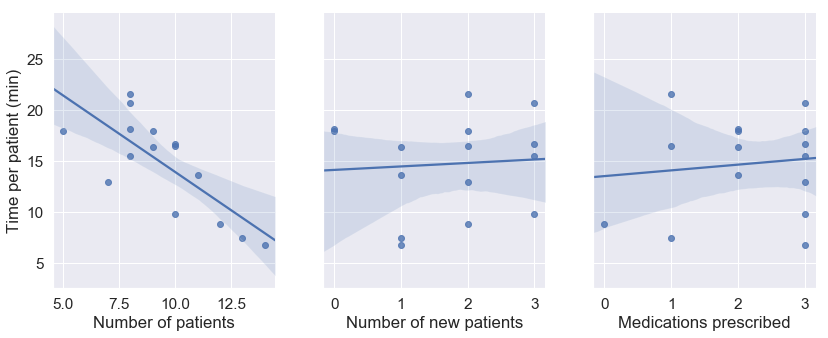

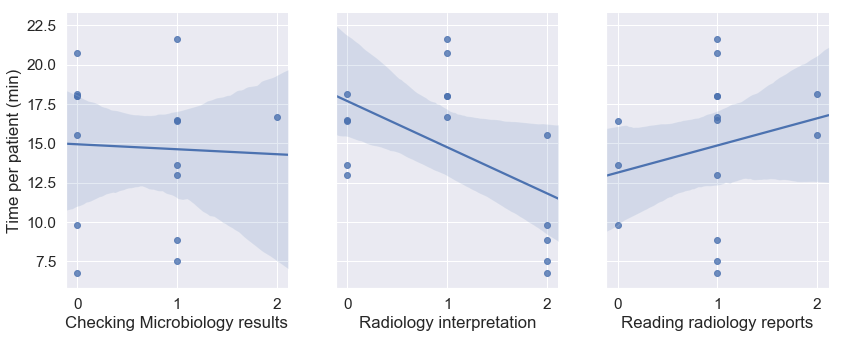

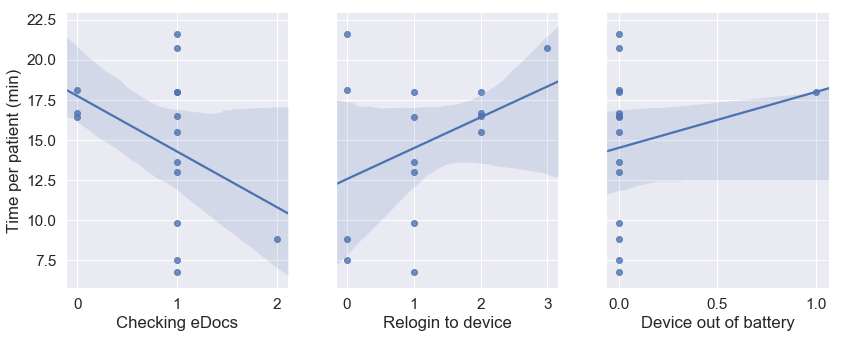

In [51]:
sns.pairplot(metrics, x_vars=metrics.columns[2:5], y_vars=["Time per patient (min)"], height=5, aspect=.8, kind="reg")
plt.savefig('metrics01.png')
plt.show()
sns.pairplot(metrics, x_vars=metrics.columns[5:8], y_vars=["Time per patient (min)"], height=5, aspect=.8, kind="reg")
plt.savefig('metrics02.png')
plt.show()
sns.pairplot(metrics, x_vars=metrics.columns[8:], y_vars=["Time per patient (min)"], height=5, aspect=.8, kind="reg")
plt.savefig('metrics03.png')
plt.show()

### Spearman's rank correlation coefficient (nonparametric testing) 
The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not).

![](https://upload.wikimedia.org/wikipedia/commons/6/67/Spearman_fig3.svg)

The Spearman correlation is less sensitive than the Pearson correlation to strong outliers that are in the tails of both samples. That is because Spearman's rho limits the outlier to the value of its rank.

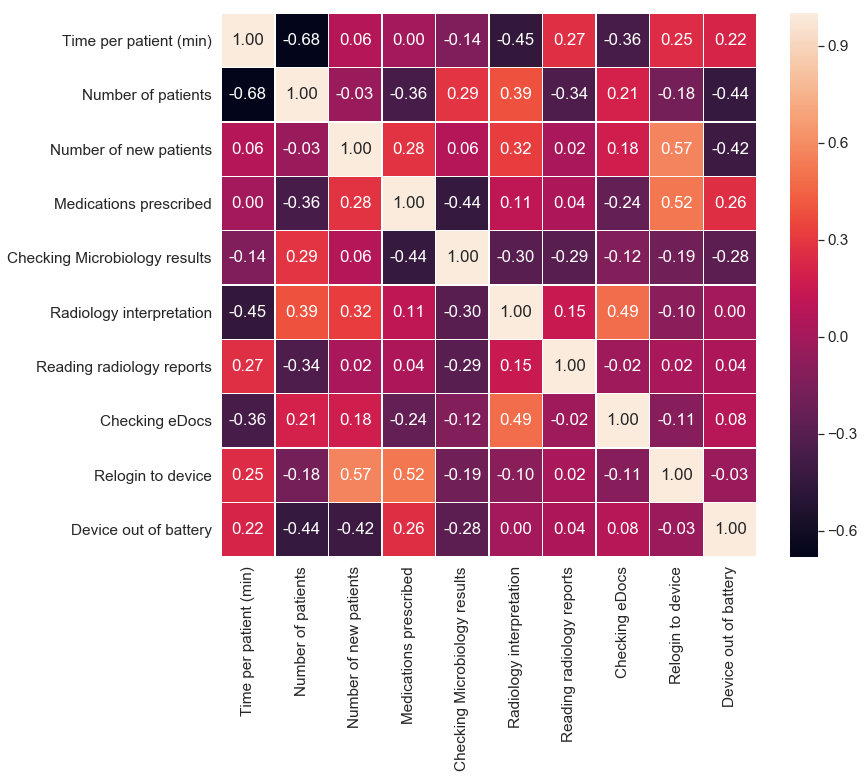

In [54]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(metrics.corr(method='spearman'), annot=True, fmt=".2f", linewidths=.5, ax=ax)
ax.set(xlabel=None, ylabel=None)
plt.show()

In [53]:
def corr_strength(x):
    x = abs(x)
    if x < 0.3:
        return 'weak'
    if x < 0.7:
        return 'moderate'
    return 'strong'
corr = pd.DataFrame(metrics.corr(method='spearman').loc['Time per patient (min)'].drop('Time per patient (min)'))
corr['strength'] = corr['Time per patient (min)'].apply(corr_strength)
corr

,Time per patient (min),strength
Number of patients,-0.680308,moderate
Number of new patients,0.064052,weak
Medications prescribed,0.004777,weak
Checking Microbiology results,-0.135883,weak
Radiology interpretation,-0.453963,moderate
Reading radiology reports,0.269856,weak
Checking eDocs,-0.364571,moderate
Relogin to device,0.254087,weak
Device out of battery,0.216700,weak
